<a href="https://colab.research.google.com/github/fppfurtado/mvp-pos-ciencia-de-dados/blob/main/Projeto_MVP_Preditor_de_Pre%C3%A7os_de_T%C3%ADtulos_P%C3%BAblicos_Federais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definição do Problema

## Objetivo
O presente projeto tem como objetivo a construção de um modelo de regressão linear para auxiliar o investidor a decidir o melhor momento de marcar a mercado seu título público, prevendo as taxas de juros ofertadas por títulos públicos federais - e, consequentemente, seus preços unitários - a partir dos valores da taxa de câmbio dolar/real (Ptax), do índice IBOVESPA e do CDS Brasil 5 anos.

## Títulos Públicos Federais
Títulos Públicos Federais são títulos de dívida emitidos pelo Governo Federal para financiar suas atvidades captando recursos de particulares em troca de pagamento de juros sobre um capital aplicado. Na prática, são **ativos de renda fixa** que possuem preço, taxa e vencimento definidos, e que podem ser adquiridos por investidores interessados.

Esses ativos possuem liquidez diária, podendo o investidor solicitar o resgate a qualquer tempo (durante o horário de funcionamento do mercado de títulos publicos), porém nesse caso o valor utilizado para o cálculo da rentabilidade será o **valor de mercado do título** no dia da solicitação de resgate, a chamada **Marcação a Mercado**, que pode fazer com que o investidor tenha ou lucro acima do esperado ou prejuízo no resgate antecipado.

O preço dos títulos públicos variam em função das respectivas taxas ofertadas. E as taxas variam diariamente, basicamente, em função da percepção de risco do mercado em relação à economia do país. Por isso, após alguma notícia negativa no cenário econômico, é comum observar fenômenos como "queda na bolsa", "alta no dolar" e "alta nos juros" pagos pelos títulos públicos federais.

## IBOVESPA
O Ibovespa é o principal indicador de desempenho das ações negociadas na B3 e reúne as empresas mais importantes do mercado de capitais brasileiro. Foi criado em 1968 e, ao longo desses 50 anos, consolidou-se como referência para investidores ao redor do mundo.

Reavaliado a cada quatro meses, o índice é resultado de uma carteira teórica de ativos. É composto pelas ações e units de companhias listadas na B3 que atendem aos critérios descritos na sua metodologia, correspondendo a cerca de 80% do número de negócios e do volume financeiro do nosso mercado de capitais.

Fonte: https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm

## PTax
Ptax é uma taxa de câmbio calculada durante o dia pelo Banco Central do Brasil. Consiste na média das taxas informadas pelas instituições financeiras durante 4 janelas do dia. É a taxa de referencia para o valor do dólar de D2 (em dois dias úteis). Normalmente, os contratos de derivativos de câmbio são liquidados com base na PTAX divulgada para o dia útil anterior.

Fonte: https://pt.wikipedia.org/wiki/Ptax

## CDS Brasil
CDS (credit default swap) é a troca de risco de crédito. O CDS é um contrato derivativo que funciona como um seguro para quem empresta dinheiro. Por levar em sua precificação o risco de inadimplência do tomador do empréstimo, o CDS é muito usado como termômetro para o risco de um país.

Fonte: https://inteligenciafinanceira.com.br/glossario/credit-default-swap-cds-risco-pais/

# 2. Coleta e Análise de Dados

## Importação de Pacotes e Módulos

In [1]:
# Importando pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

## Configurações prévias

In [2]:
# Suprimindo warnings
warnings.filterwarnings('ignore')

## Carregamento dos Dados

Serão carregados os datasets dos dados históricos de cinco anos das quatro variáveis econômicas que serão tratadas posteriormente pelo modelo de regressão linear: 

+ taxas e preços de título públicos federais
+ taxa de câmbio PTax
+ índice IBOVESPA
+ CDS Brasil 5 anos.

In [3]:
# Carregando o histórico de preços de preços e taxas de títulos públicos
historico_titulos = pd.read_csv('https://github.com/fppfurtado/mvp-pos-ciencia-de-dados/raw/main/DADOS/historico_titulos.csv', decimal = ',')
# Carregando o histórico do índice IBOVESPA
historico_ibov = pd.read_csv('https://raw.githubusercontent.com/fppfurtado/mvp-pos-ciencia-de-dados/main/DADOS/historico_ibov.csv', decimal = ',')
# Carregando o histórico da taxa de câmbio PTax
historico_ptax = pd.read_csv('https://raw.githubusercontent.com/fppfurtado/mvp-pos-ciencia-de-dados/main/DADOS/historico_ptax.csv', decimal = ',')
# Carregando o histórico do CDS Brasil 5 Anos
historico_cds5y = pd.read_csv('https://raw.githubusercontent.com/fppfurtado/mvp-pos-ciencia-de-dados/main/DADOS/historico_csd5y.csv', decimal = ',')

Posteriormente, na seção de Pré-Processamento, será feita uma junção dos quatro datasets em um único dataset, apenas com os atributos relevantes para o modelo.

## Análise Exploratória

Para a exploração dos dados dos datasets, seguiremos o seguinte roteiro para cada dataset:

1. Análise das informações gerais sobre o dataset
2. Análise de amostras dos dados
3. Análise das principais estatísticas descritivas
4. Visualizações Unimodais dos atributos relevantes
5. Visualizações Multimodais dos atributos relevantes

### Análise Títulos Públicos

Vamos iniciar observando algumas linhas do dataset

In [4]:
# exibindo linhas de fronteiras (início e fim) do dataset
historico_titulos

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro Prefixado com Juros Semestrais,2029-01-01,2020-12-17,6.85,6.97,1232.57,1224.7,1224.37
1,Tesouro IPCA+,2026-08-15,2020-12-17,2.42,2.54,2972.71,2953.13,2951.64
2,Tesouro IPCA+,2024-08-15,2020-12-17,1.67,1.79,3203.16,3189.44,3187.92
3,Tesouro IGPM+ com Juros Semestrais,2021-04-01,2020-12-17,-0.42,-0.3,5230.64,5228.89,5226.79
4,Tesouro Prefixado,2023-01-01,2020-12-17,4.49,4.61,914.78,912.66,912.49
...,...,...,...,...,...,...,...,...
129252,Tesouro Prefixado,2018-01-01,2014-10-09,11.82,11.88,698.92,697.72,697.41
129253,Tesouro Prefixado,2017-01-01,2014-10-09,11.86,11.92,779.87,778.95,778.6
129254,Tesouro Selic,2015-03-07,2014-10-09,0.0,0.01,6381.61,6381.35,6378.71
129255,Tesouro Prefixado,2016-01-01,2014-10-09,11.9,11.94,871.6,871.22,870.83


Vemos que o dataset acima apresenta as principais informações de negociação para cada classe de título público em escala diária (atributo "Data Base"). Também é informada, no final do quadro, as dimensões do dataset: 129.257 linhas (instâncias) x 08 (atributos).

Para cada título ofertado, temos a Data Base da oferta, a Data de Vencimento do título, as taxas de juros anuais e os PUs (preços unitários) de cada título para aquele dia. Operações de compra e de venda de títulos possuem taxas e preços distintos num mesmdo dia. Para o nosso modelo, que terá como objetivo a predição das taxas dos título em caso de resgate antecipado (marcação a mercado), só consideraremos como atributo quantitativo relevante o atributo **Taxa Venda Manha**.

Abaixo podemos verificar quais tipos de títulos foram ofertados ao longo do período e a quantidade de ofertas associada a cada título.

In [5]:
historico_titulos['Tipo Titulo'].value_counts()

Tesouro IPCA+ com Juros Semestrais        36207
Tesouro Prefixado                         23723
Tesouro Prefixado com Juros Semestrais    22582
Tesouro Selic                             17317
Tesouro IGPM+ com Juros Semestrais        14935
Tesouro IPCA+                             14109
Tesouro Renda+ Aposentadoria Extra          384
Name: Tipo Titulo, dtype: int64

Nota-se que o título "Tesouro Renda+ Aposentadoria Extra" possui uma quantidade ofertas consideravelmente menor do que os demais em razão de ser um títutlo bastante recente, criado e negociado somente a partir de 2023.

Vamos agora visualizar algumas informações gerais sobre a estrutura do dataset.

In [6]:
# Exibindo informações gerais sobre o dataset
historico_titulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129257 entries, 0 to 129256
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Tipo Titulo        129257 non-null  object
 1   Data Vencimento    129257 non-null  object
 2   Data Base          129257 non-null  object
 3   Taxa Compra Manha  129257 non-null  object
 4   Taxa Venda Manha   129257 non-null  object
 5   PU Compra Manha    129257 non-null  object
 6   PU Venda Manha     129257 non-null  object
 7   PU Base Manha      129257 non-null  object
dtypes: object(8)
memory usage: 7.9+ MB


É possível notar a falta de *missings* (valores nulos) nos atributos do dataset. Isso é explicado pela fato de o dataset não possuir dados oriundos diretamente de entradas de usuário (ex.: formulários), mas apenas dados computados automaticamente pelo sistema de negociação de títulos públicos.

Nota-se também que os atributos estão todos formatados com o tipo "object", que basicamente significa que estão armazenados no dataframe como *string* (texto). Isso dificultará operações de análise, como ordenações e filtros, sendo necessário a conversão desse dados para o tipo adequado.

In [7]:
# convertendo atributos relevantes para os tipos adequados
historico_titulos = historico_titulos.astype(
    {
      'Data Vencimento': 'datetime64',
      'Data Base': 'datetime64',
      'Taxa Compra Manha': 'float',
      'Taxa Venda Manha': 'float',
      'PU Compra Manha': 'float',
      'PU Venda Manha': 'float',
      'PU Base Manha': 'float',
    }
)
 # conferindo o resultado da conversão de tipos
historico_titulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129257 entries, 0 to 129256
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Tipo Titulo        129257 non-null  object        
 1   Data Vencimento    129257 non-null  datetime64[ns]
 2   Data Base          129257 non-null  datetime64[ns]
 3   Taxa Compra Manha  129257 non-null  float64       
 4   Taxa Venda Manha   129257 non-null  float64       
 5   PU Compra Manha    129257 non-null  float64       
 6   PU Venda Manha     129257 non-null  float64       
 7   PU Base Manha      129257 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(1)
memory usage: 7.9+ MB


Agora apenas o atributo categórico "Tipo Titulo" está estruturado como texto, os demais tiveram seu tipo de dados alterado conformo a informação representada, data ou número.

In [8]:
# exibindo linhas de fronteiras (início e fim) do dataset ordenadas pelo atributo 'Data Base'
historico_titulos.sort_values('Data Base', ascending = False)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
4799,Tesouro Renda+ Aposentadoria Extra,2069-12-15,2023-04-10,6.17,6.29,484.85,466.01,466.01
4775,Tesouro IPCA+ com Juros Semestrais,2055-05-15,2023-04-10,6.16,6.28,4110.76,4043.73,4043.73
4783,Tesouro Renda+ Aposentadoria Extra,2054-12-15,2023-04-10,6.22,6.34,1175.76,1149.36,1149.36
4782,Tesouro Renda+ Aposentadoria Extra,2074-12-15,2023-04-10,6.14,6.26,363.80,347.69,347.69
4780,Tesouro Prefixado,2026-01-01,2023-04-10,11.96,12.08,734.59,732.12,732.12
...,...,...,...,...,...,...,...,...
7040,Tesouro IGPM+ com Juros Semestrais,2011-03-01,2004-12-31,8.33,8.39,1647.67,1643.07,1641.39
7041,Tesouro IGPM+ com Juros Semestrais,2017-07-01,2004-12-31,8.26,8.34,1500.78,1491.30,1543.01
7042,Tesouro IGPM+ com Juros Semestrais,2021-04-01,2004-12-31,8.25,8.33,1482.71,1472.08,1470.58
7043,Tesouro IGPM+ com Juros Semestrais,2031-01-01,2004-12-31,8.24,8.34,2508.78,2484.40,2586.83


Vericamos pelo quadro acima a coerência temporal dos dados e a abrangência do período do dataset: 31/12/2004 até 10/04/2023. Considerando que nesse projeto trabalharemos com a abrangência temporal dos últimos de cinco anos, esse dataset deverá posterioremente ser reduzido.

Abaixo a análise das principais estatísticas descritivas do atributo 'Taxa Venda Manha'.

In [9]:
historico_titulos.groupby('Tipo Titulo').describe()[['Taxa Venda Manha']].applymap('{:,.2f}'.format)

Taxa Venda Manha                      \
                                                  count   mean   std    min   
Tipo Titulo                                                                   
Tesouro IGPM+ com Juros Semestrais            14,935.00   6.57  2.44  -3.41   
Tesouro IPCA+                                 14,109.00   5.48  1.62  -1.46   
Tesouro IPCA+ com Juros Semestrais            36,207.00   6.07  1.94  -3.00   
Tesouro Prefixado                             23,723.00  11.53  3.46   1.95   
Tesouro Prefixado com Juros Semestrais        22,582.00  11.26  2.73   0.06   
Tesouro Renda+ Aposentadoria Extra               384.00   6.49  0.12   6.20   
Tesouro Selic                                 17,317.00   0.05  0.08  -0.07   

                                                                   
                                         25%    50%    75%    max  
Tipo Titulo                                                        
Tesouro IGPM+ com Juros Semestrais      5.38   6.42   7.92  17.13  
Tesouro IPCA+                           4.38   5.75   6.41  11.08  
Tesouro IPCA+ com Juros Semestrais      4.89   6.08   6.94  13.03  
Tesouro Prefixado                       9.26  11.73  13.42  20.13  
Tesouro Prefixado com Juros Semestrais  9.62  11.77  12.83  18.82  
Tesouro Renda+ Aposentadoria Extra      6.41   6.51   6.58   6.68  
Tesouro Selic                           0.01   0.03   0.04   0.46

Excluindo o título do tipo "IGPM", que era ofertado até 2006, nota-se que o título com maior valor histórico de taxa e maior desvio padrão é o título do tipo "Prefixado", o que possivelmente indica uma maior volatilidade (risco) desse ativo.

(array([  161., 17871.,  6637., 25733., 32204., 15551., 19578.,  7511.,
         2482.,  1529.]),
 array([-3.41 , -1.056,  1.298,  3.652,  6.006,  8.36 , 10.714, 13.068,
        15.422, 17.776, 20.13 ]),
 <BarContainer object of 10 artists>)

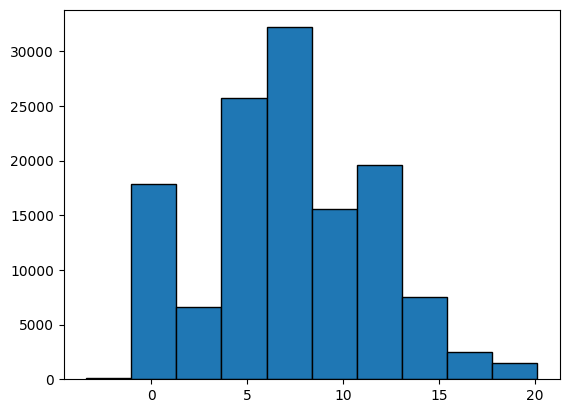

In [18]:
# exibindo o histograma do atributo 'Taxa Venda Manha'
plt.hist(historico_titulos['Taxa Venda Manha'], edgecolor='black', bins=10)

<Axes: ylabel='Density'>

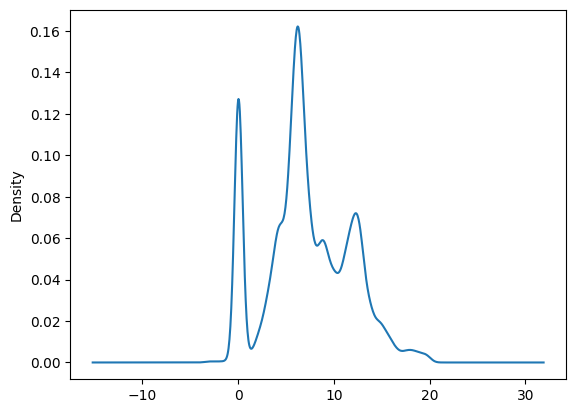

In [19]:
# exibindo a função densidade de probabilidade do atributo 'Taxa Venda Manha'
historico_titulos['Taxa Venda Manha'].plot(kind='density')

Ambos os gráficos indicam que as taxas de maior frequência, e consequentemente de maior probabilidade de ocorrência de acordo com o histórico, são aquelas cujos valores estão entre 0 e 10.

<Axes: >

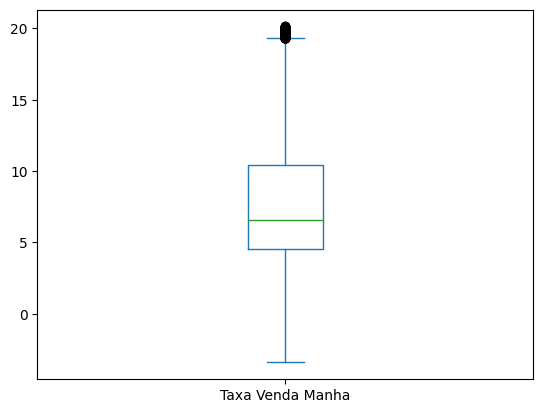

In [22]:
historico_titulos['Taxa Venda Manha'].plot(kind = 'box')

### Análise IBOVESPA

### Análise PTax

### Análise CDS 5Y